In [1]:
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from astropy.io import fits
from astropy.table import Table, vstack
import astropy.units as u

plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 24,
    'axes.labelsize': 'large',
    'mathtext.fontset': 'stix'
})

## Check dependence of size on redshift/stellar mass

### Redshift

In [201]:
with fits.open('http://www.gama-survey.org/dr4/data/cat/gkvInputCat/v02/gkvScienceCatv02.fits') as cat:
    gkvScienceCat = Table(cat[1].data)

In [ ]:
with fits.open('/data2/lsajkov/mpdg/data/GAMA/gkvScienceCatv02.fits') as cat:
    gkvScienceCat = Table(cat[1].data)

In [202]:
cat_R50 = gkvScienceCat['R50'] #half-light radius ()
cat_z = gkvScienceCat['Z'] #redshift

#cuts:
R50_cut = cat_R50 < 5
z_cut = (cat_z > 0) & (cat_z < 0.5)

total_cut = R50_cut & z_cut

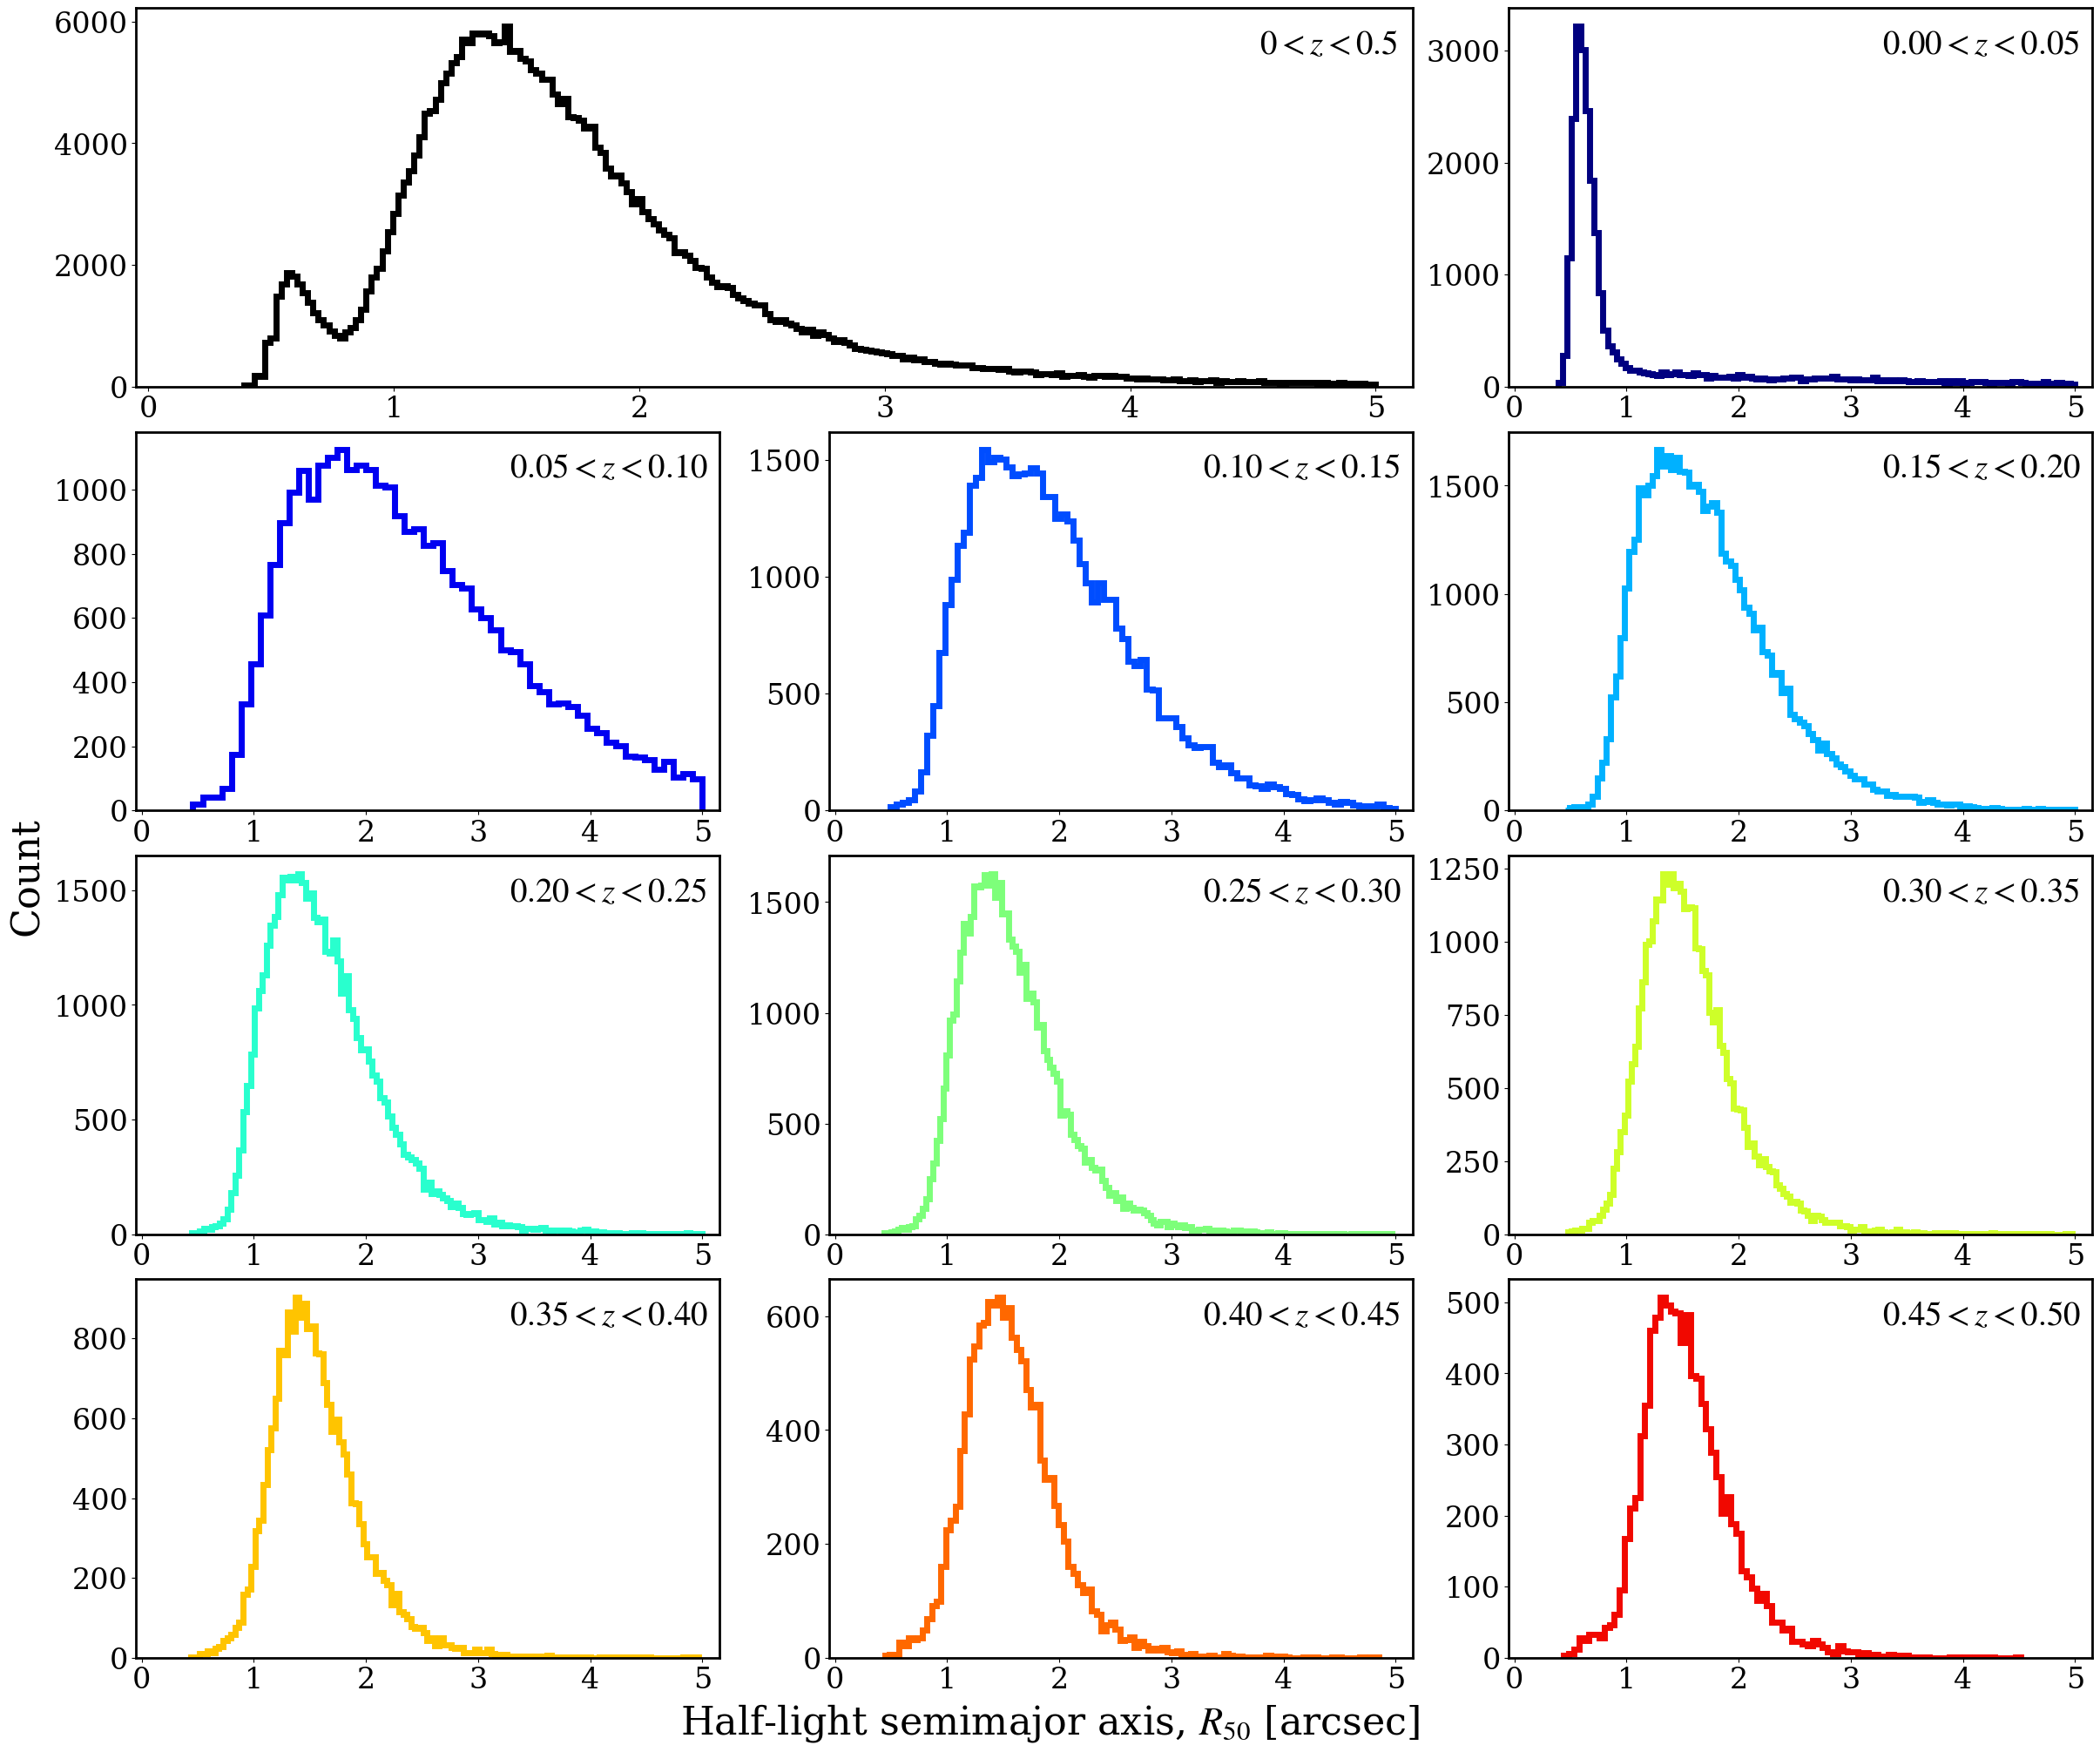

In [204]:
fig = plt.figure(figsize = (24, 20), constrained_layout = True)
gs = fig.add_gridspec(4, 3)

vals, bins = np.histogram(cat_R50[total_cut], bins = 'auto')
ax = fig.add_subplot(gs[0, :2])
ax.stairs(vals, bins, linewidth = 5,
          color = 'black')

ax.text(0.88, 0.88,
        f'$0 < z < 0.5$', fontsize = 28,
        transform = ax.transAxes)

ax.set_xlim(-0.05, 5.15)

for axis in ['top', 'right', 'bottom', 'left']:
    ax.spines[axis].set_linewidth(2)

delta_z = 0.05

i = 2
for z_lo in np.arange(0, 0.5, delta_z):
    z_bin = (z_lo <= cat_z) & (cat_z < z_lo + delta_z)
    vals, bins = np.histogram(cat_R50[total_cut & z_bin], bins = 'auto')
    
    ax = fig.add_subplot(gs[i])
    ax.stairs(vals, bins,
              color = mpl.cm.jet((i - 2)/10), linewidth = 5)

    ax.text(0.64, 0.88,
            f'${z_lo:.2f} < z < {(z_lo + delta_z):.2f}$', fontsize = 28,
            transform = ax.transAxes)
    
    for axis in ['top', 'right', 'bottom', 'left']:
        ax.spines[axis].set_linewidth(2)

    ax.set_xlim(-0.05, 5.15)

    i += 1

fig.supxlabel('Half-light semimajor axis, $R_{50}$ [arcsec]', fontsize = 32)
fig.supylabel('Count', fontsize = 32)

fig.savefig('/data2/lsajkov/mpdg/figures/GAMA/GAMA_size_redshift_dependence.png',
            dpi = 150)

### Stellar mass

In [174]:
with fits.open('/data2/lsajkov/mpdg/data/GAMA/gkvScienceCatv02.fits') as cat:
    gkvScienceCat = Table(cat[1].data)

with fits.open('/data2/lsajkov/mpdg/data/GAMA/StellarMassesGKVv24.fits') as cat:
    StellarMassesGKV = Table(cat[1].data)

In [ ]:
ScienceCat_mstar_mask = [True if uberID in StellarMassesGKV['uberID'] else False\
                         for uberID in gkvScienceCat['uberID']]

In [205]:
with fits.open('/data2/lsajkov/mpdg/data/GAMA/matched_ScienceCat_StellarMassesGKV.fits') as cat:
    ScienceCat_StellarMasses = Table(cat[1].data)

In [206]:
cat_R50 = ScienceCat_StellarMasses['R50'] #half-light radius ()
cat_mstar = ScienceCat_StellarMasses['logmstar'] #redshift

#cuts:
R50_cut = cat_R50 < 5
mstar_cut = (cat_mstar > 6) & (cat_mstar < 11)

total_cut = R50_cut & mstar_cut

<>:10: SyntaxWarning: invalid escape sequence '\l'
<>:29: SyntaxWarning: invalid escape sequence '\l'
<>:10: SyntaxWarning: invalid escape sequence '\l'
<>:29: SyntaxWarning: invalid escape sequence '\l'
/var/tmp/lsajkov/ipykernel_841568/1044199225.py:10: SyntaxWarning: invalid escape sequence '\l'
  f'$6 < \log(M_*) < 11$', fontsize = 28,
/var/tmp/lsajkov/ipykernel_841568/1044199225.py:29: SyntaxWarning: invalid escape sequence '\l'
  f'${mstar_lo:.2f} < \log(M_*) < {(mstar_lo + delta_mstar):.2f}$', fontsize = 28,


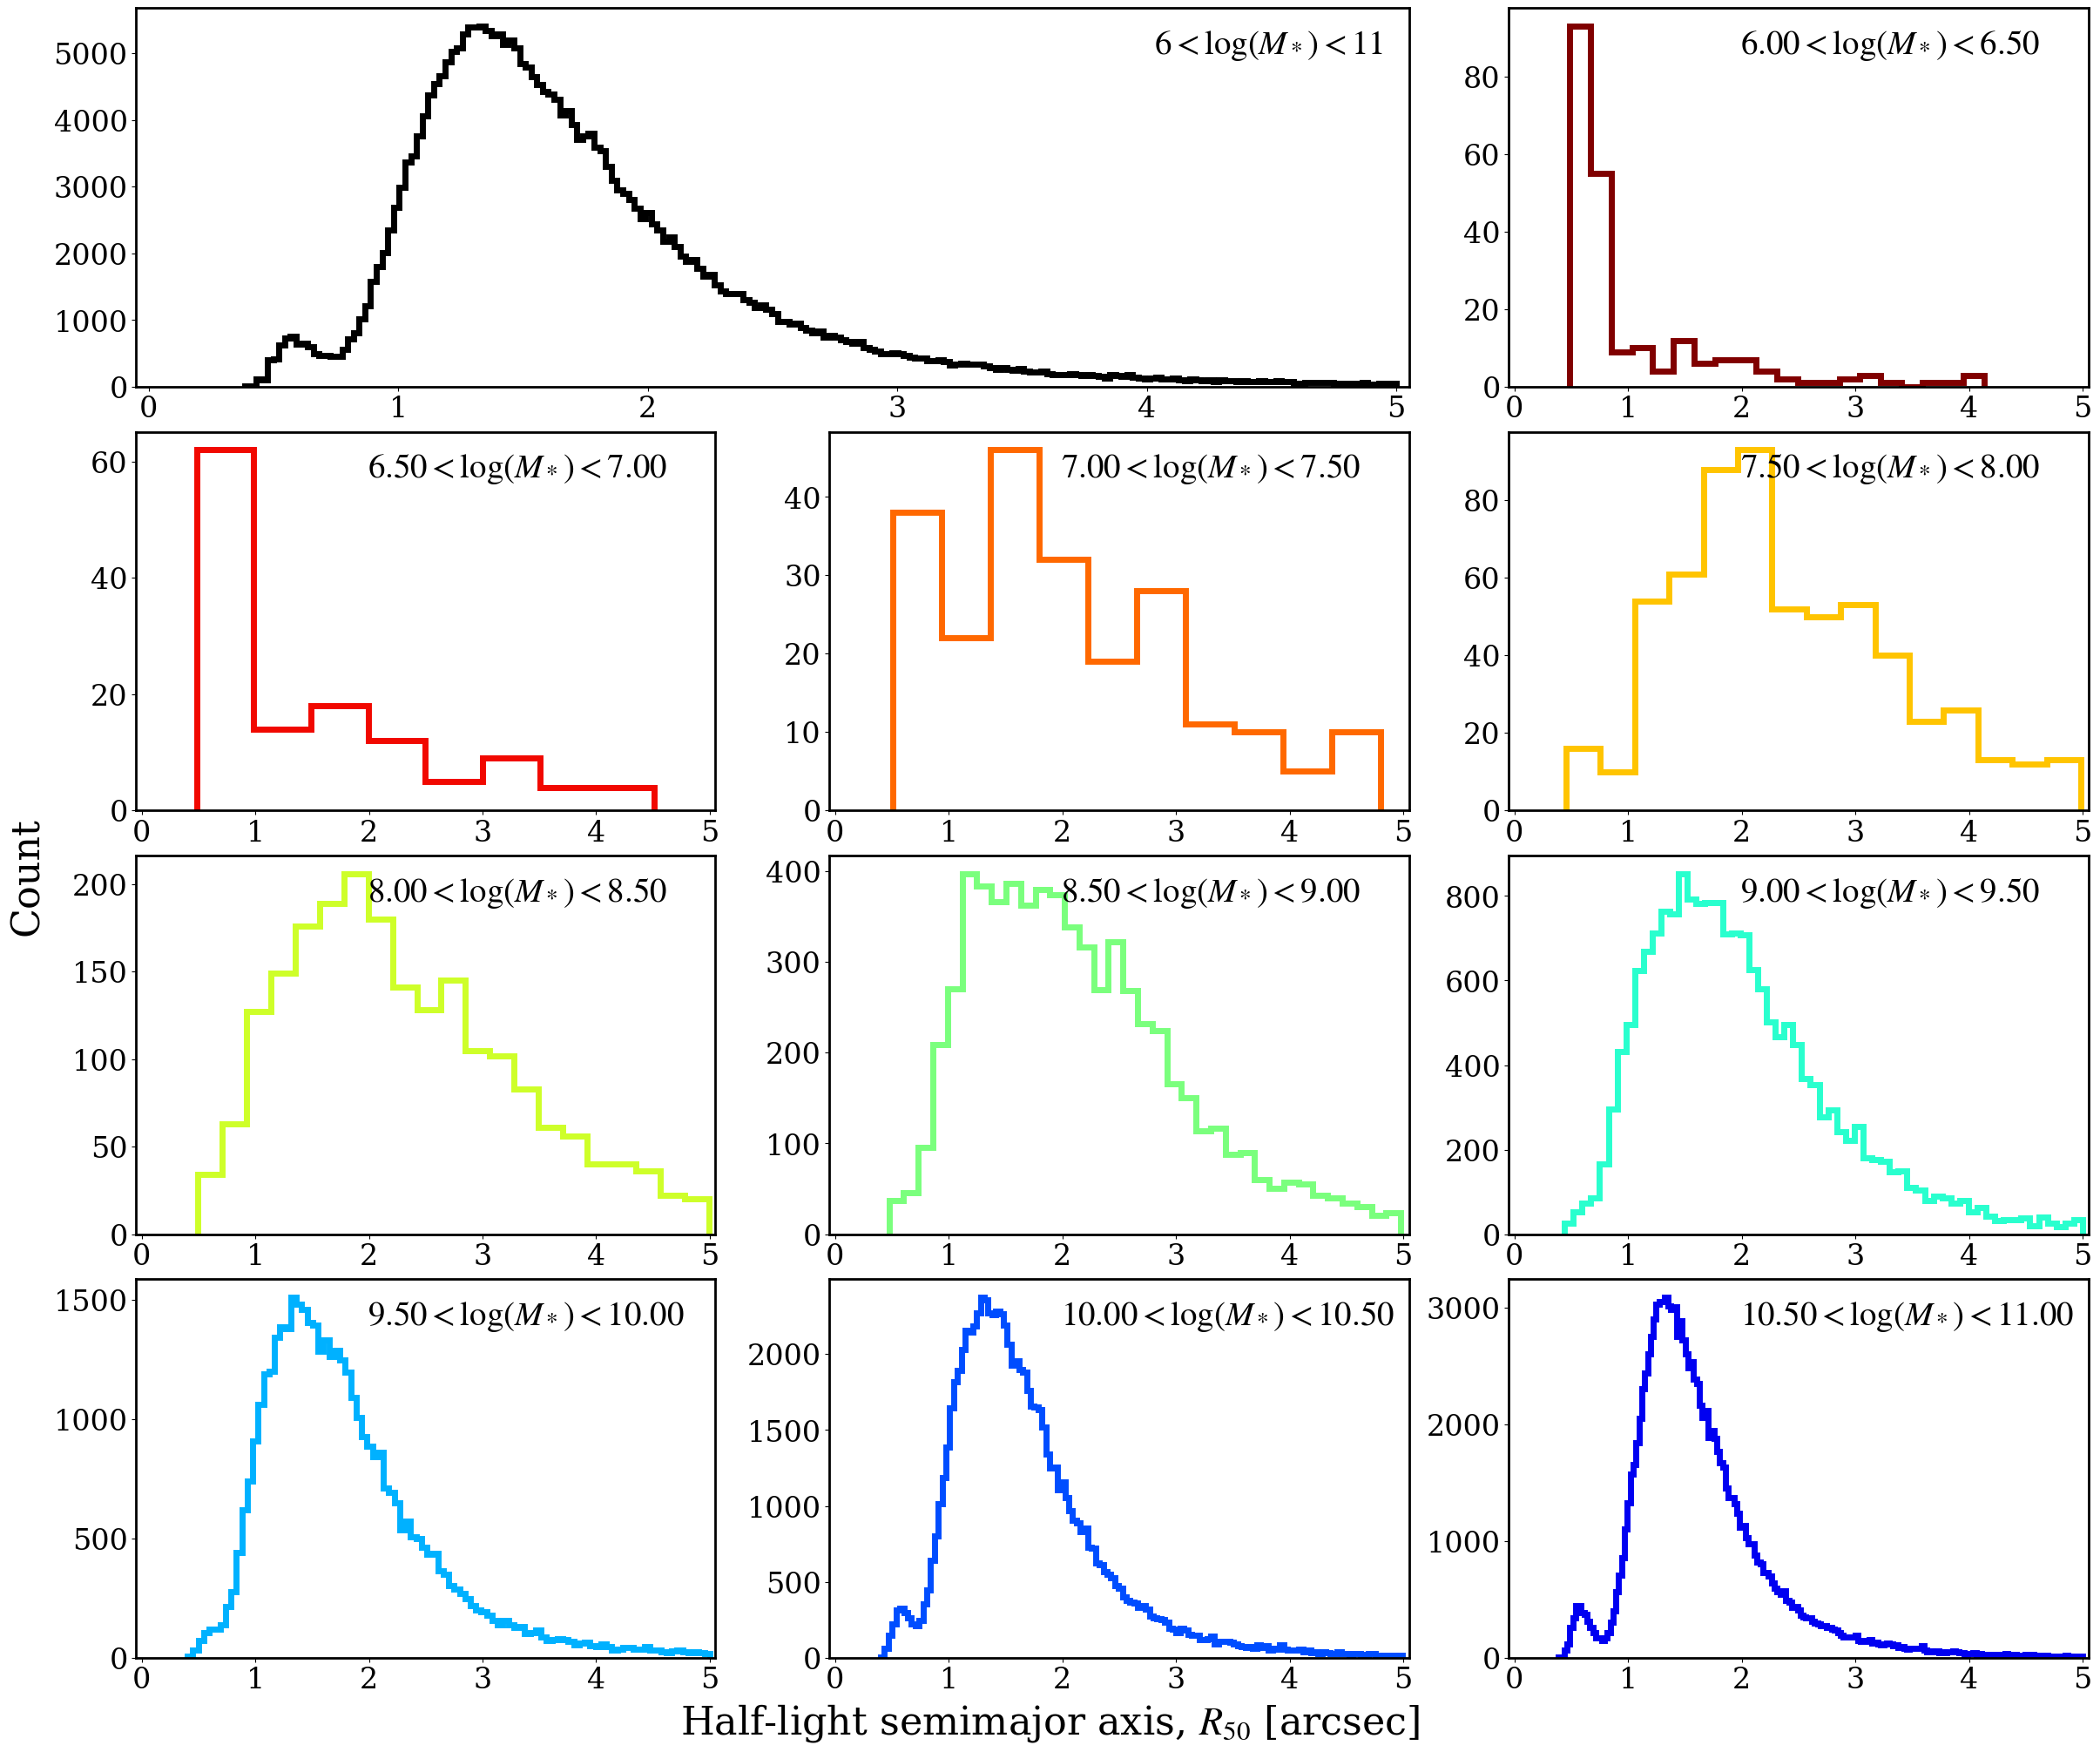

In [224]:
fig = plt.figure(figsize = (24, 20), constrained_layout = True)
gs = fig.add_gridspec(4, 3)

vals, bins = np.histogram(cat_R50[total_cut], bins = 'auto')
ax = fig.add_subplot(gs[0, :2])
ax.stairs(vals, bins, linewidth = 5,
          color = 'black')

ax.text(0.8, 0.88,
        f'$6 < \log(M_*) < 11$', fontsize = 28,
        transform = ax.transAxes)

ax.set_xlim(-0.05, 5.05)
for axis in ['top', 'right', 'bottom', 'left']:
    ax.spines[axis].set_linewidth(2)

delta_mstar = 0.5

i = 2
for mstar_lo in np.arange(6, 11, delta_mstar):
    mstar_bin = (mstar_lo <= cat_mstar) & (cat_mstar < mstar_lo + delta_mstar)
    vals, bins = np.histogram(cat_R50[total_cut & mstar_bin], bins = 'auto')
    
    ax = fig.add_subplot(gs[i])
    ax.stairs(vals, bins,
              color = mpl.cm.jet_r((i - 2)/10), linewidth = 5)

    ax.text(0.4, 0.88,
            f'${mstar_lo:.2f} < \log(M_*) < {(mstar_lo + delta_mstar):.2f}$', fontsize = 28,
            transform = ax.transAxes)
    
    for axis in ['top', 'right', 'bottom', 'left']:
        ax.spines[axis].set_linewidth(2)

    ax.set_xlim(-0.05, 5.05)

    i += 1

fig.supxlabel('Half-light semimajor axis, $R_{50}$ [arcsec]', fontsize = 32)
fig.supylabel('Count', fontsize = 32)

fig.savefig('/data2/lsajkov/mpdg/figures/GAMA/GAMA_size_mstar_dependence.png',
            dpi = 150)